Keys- Multinomial Naive Bayes, WordCloud, TextBlob, Word Frequency, StopWords, Sentiments, NLP, NLTK

Import Required Libraries:-


In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\typing_extensions.cpython-38.pyc'
Consider using the `--user` option or check the permissions.



  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Using cached pydantic-1.8.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Using cached tqdm-4.62.0-py2.py3-none-any.whl (76 kB)
  Using cached typing_extensions-3.10.0.0-py3-none-any.whl (26 kB)
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248514 sha256=d6ddeb7ea005779c4ec5f157b6819dc5a9bc9140ea271ec3d07440fa7d24cc02
  Stored in directory: C:\Users\shobh\AppData\Local\Temp\pip-ephem-wheel-cache-ysl7sbo1\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.2
    Uninstalling typing-extensions-3.7.4.2:


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing file into dataframe

In [3]:
df=pd.read_csv('customer_rating.csv')
df

,Rating,Reviews
0,3,Just okay
1,5,Simply awesome
2,5,Just wow!
3,4,Good quality product
4,5,Terrific purchase
...,...,...
26496,5,Brilliant
26497,5,Worth every penny
26498,5,Super!
26499,4,Good quality product


Is there any correlation between user's rating and reviews length ?

In [4]:
df['Reviews']=df['Reviews'].astype(str)
df['Reviews Length']=df['Reviews'].apply(len)

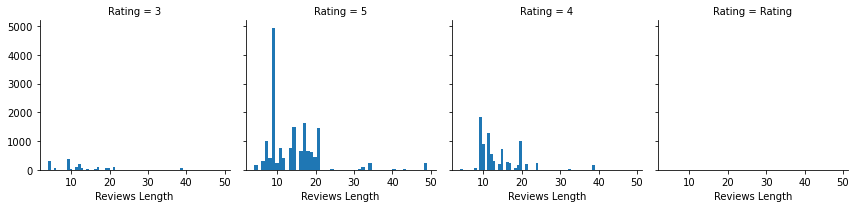

In [5]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Reviews Length', bins=50)

From the above chart, we can say that the users gave 5 rating oftenly. Infact, there are less no of users who gave rating 3 and below.

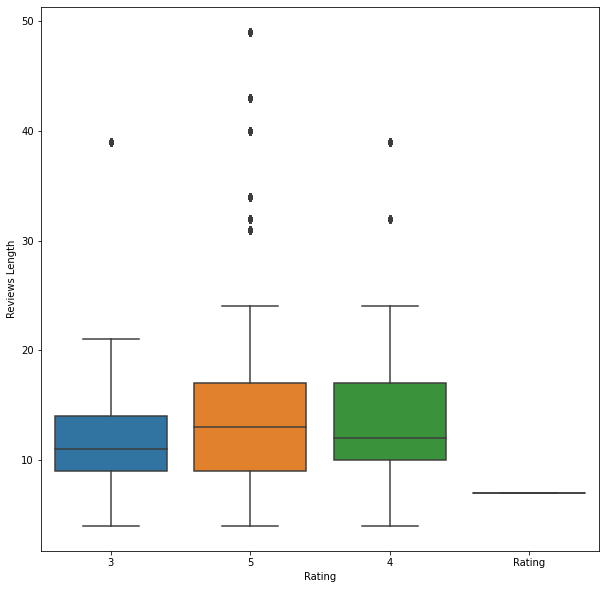

In [6]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Reviews Length', data=df)

From the above boxplot, we can conclude that the rating 4 and 5 have more lenth in review.

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shobh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shobh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [10]:
!pip install stop-words

In [11]:
from wordcloud import WordCloud

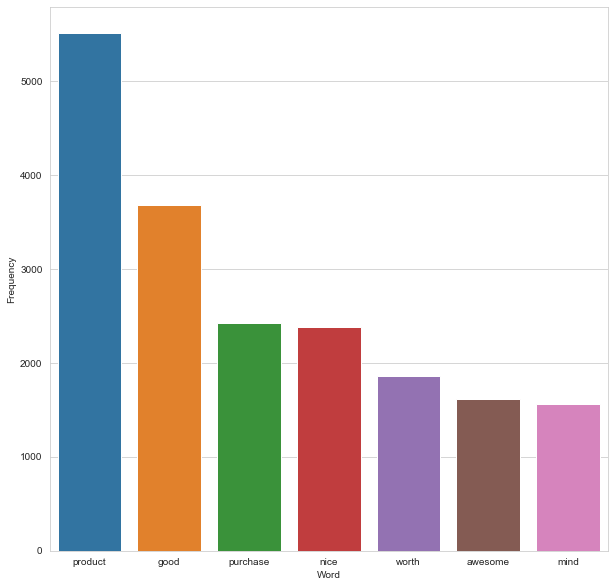

In [12]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['Reviews'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

The above barplot calculates the frequency of the word in Review Text column. The word product appeared more in the text. Next to this, the word good comes second which is an indicator of positive reviews.



In [13]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

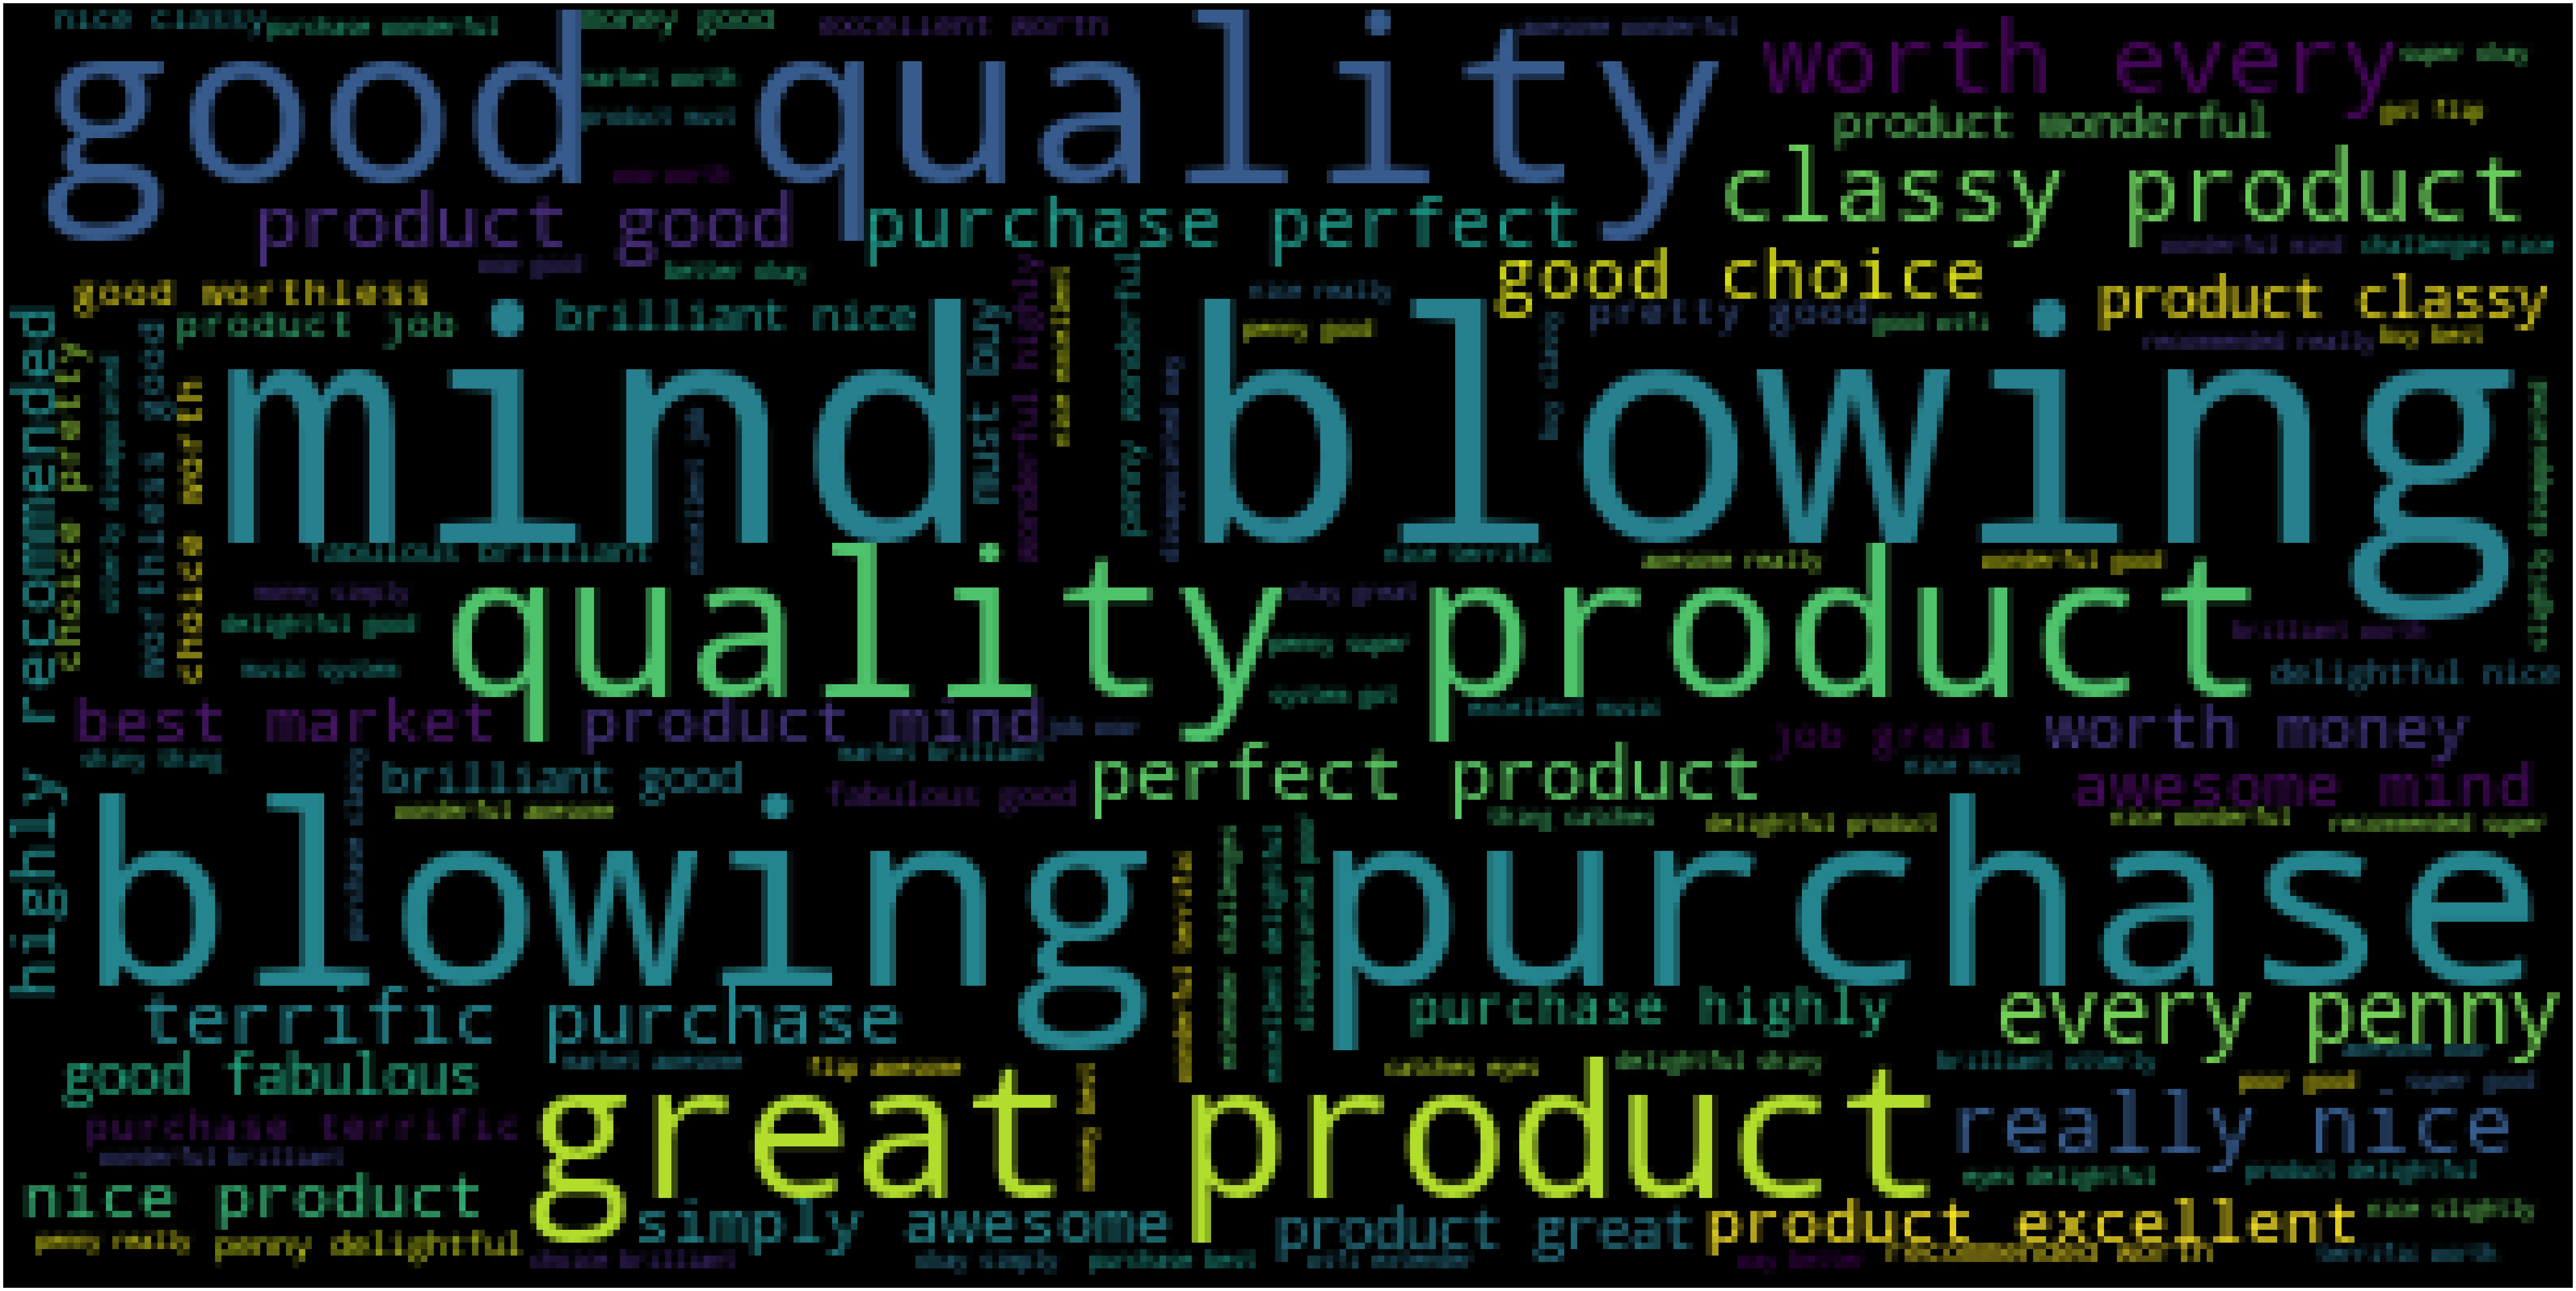

In [14]:
wc(cleaned_data_title,'black','Most Used Words')

The above wordcloud is for the most oftenly used words in the Review Text column

In [15]:
!pip install textblob

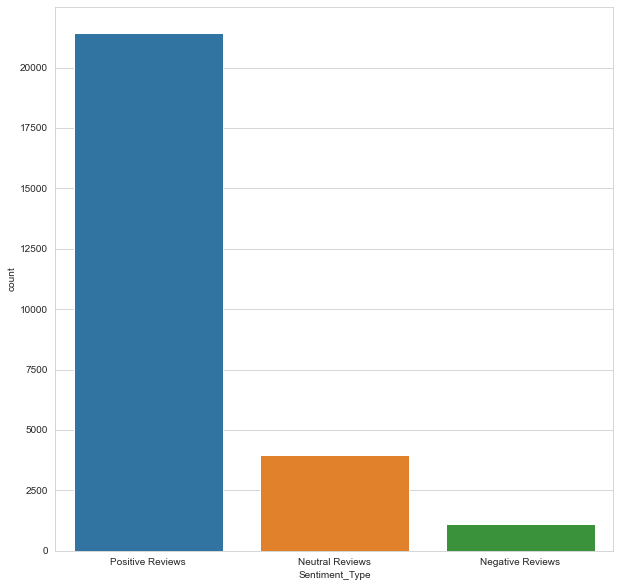

In [16]:
from textblob import TextBlob

bloblist_desc = list()

df_reviews_str=df['Reviews'].astype(str)
for row in df_reviews_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Reviews','sentiment','polarity'])
    
def f(df_polarity_desc):
    
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Reviews"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Reviews"
    else:
        val = "Negative Reviews"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)
    

According to the above graph, there are more positive reviews but again it depends on the polarity value. I condsidered sentiment value > 0 is Positive Reviews.

In [17]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Reviews']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Reviews']

In [19]:
positive_reviews

,Reviews,sentiment,polarity,Sentiment_Type
0,Just okay,0.500000,0.500000,Positive Reviews
1,Simply awesome,1.000000,1.000000,Positive Reviews
2,Just wow!,0.125000,1.000000,Positive Reviews
3,Good quality product,0.700000,0.600000,Positive Reviews
5,Highly recommended,0.160000,0.540000,Positive Reviews
...,...,...,...,...
26495,Best in the market!,1.000000,0.300000,Positive Reviews
26496,Brilliant,0.900000,1.000000,Positive Reviews
26497,Worth every penny,0.300000,0.100000,Positive Reviews
26498,Super!,0.416667,0.666667,Positive Reviews


In [20]:
negative_reviews

,Reviews,sentiment,polarity,Sentiment_Type
13,Utterly Disappointed,-0.75,0.75,Negative Reviews
14,Very poor,-0.52,0.78,Negative Reviews
18,Slightly disappointed,-0.75,0.75,Negative Reviews
33,Utterly Disappointed,-0.75,0.75,Negative Reviews
34,Very poor,-0.52,0.78,Negative Reviews
...,...,...,...,...
23053,Very poor,-0.52,0.78,Negative Reviews
23063,Horrible,-1.00,1.00,Negative Reviews
23073,Very poor,-0.52,0.78,Negative Reviews
23083,Horrible,-1.00,1.00,Negative Reviews


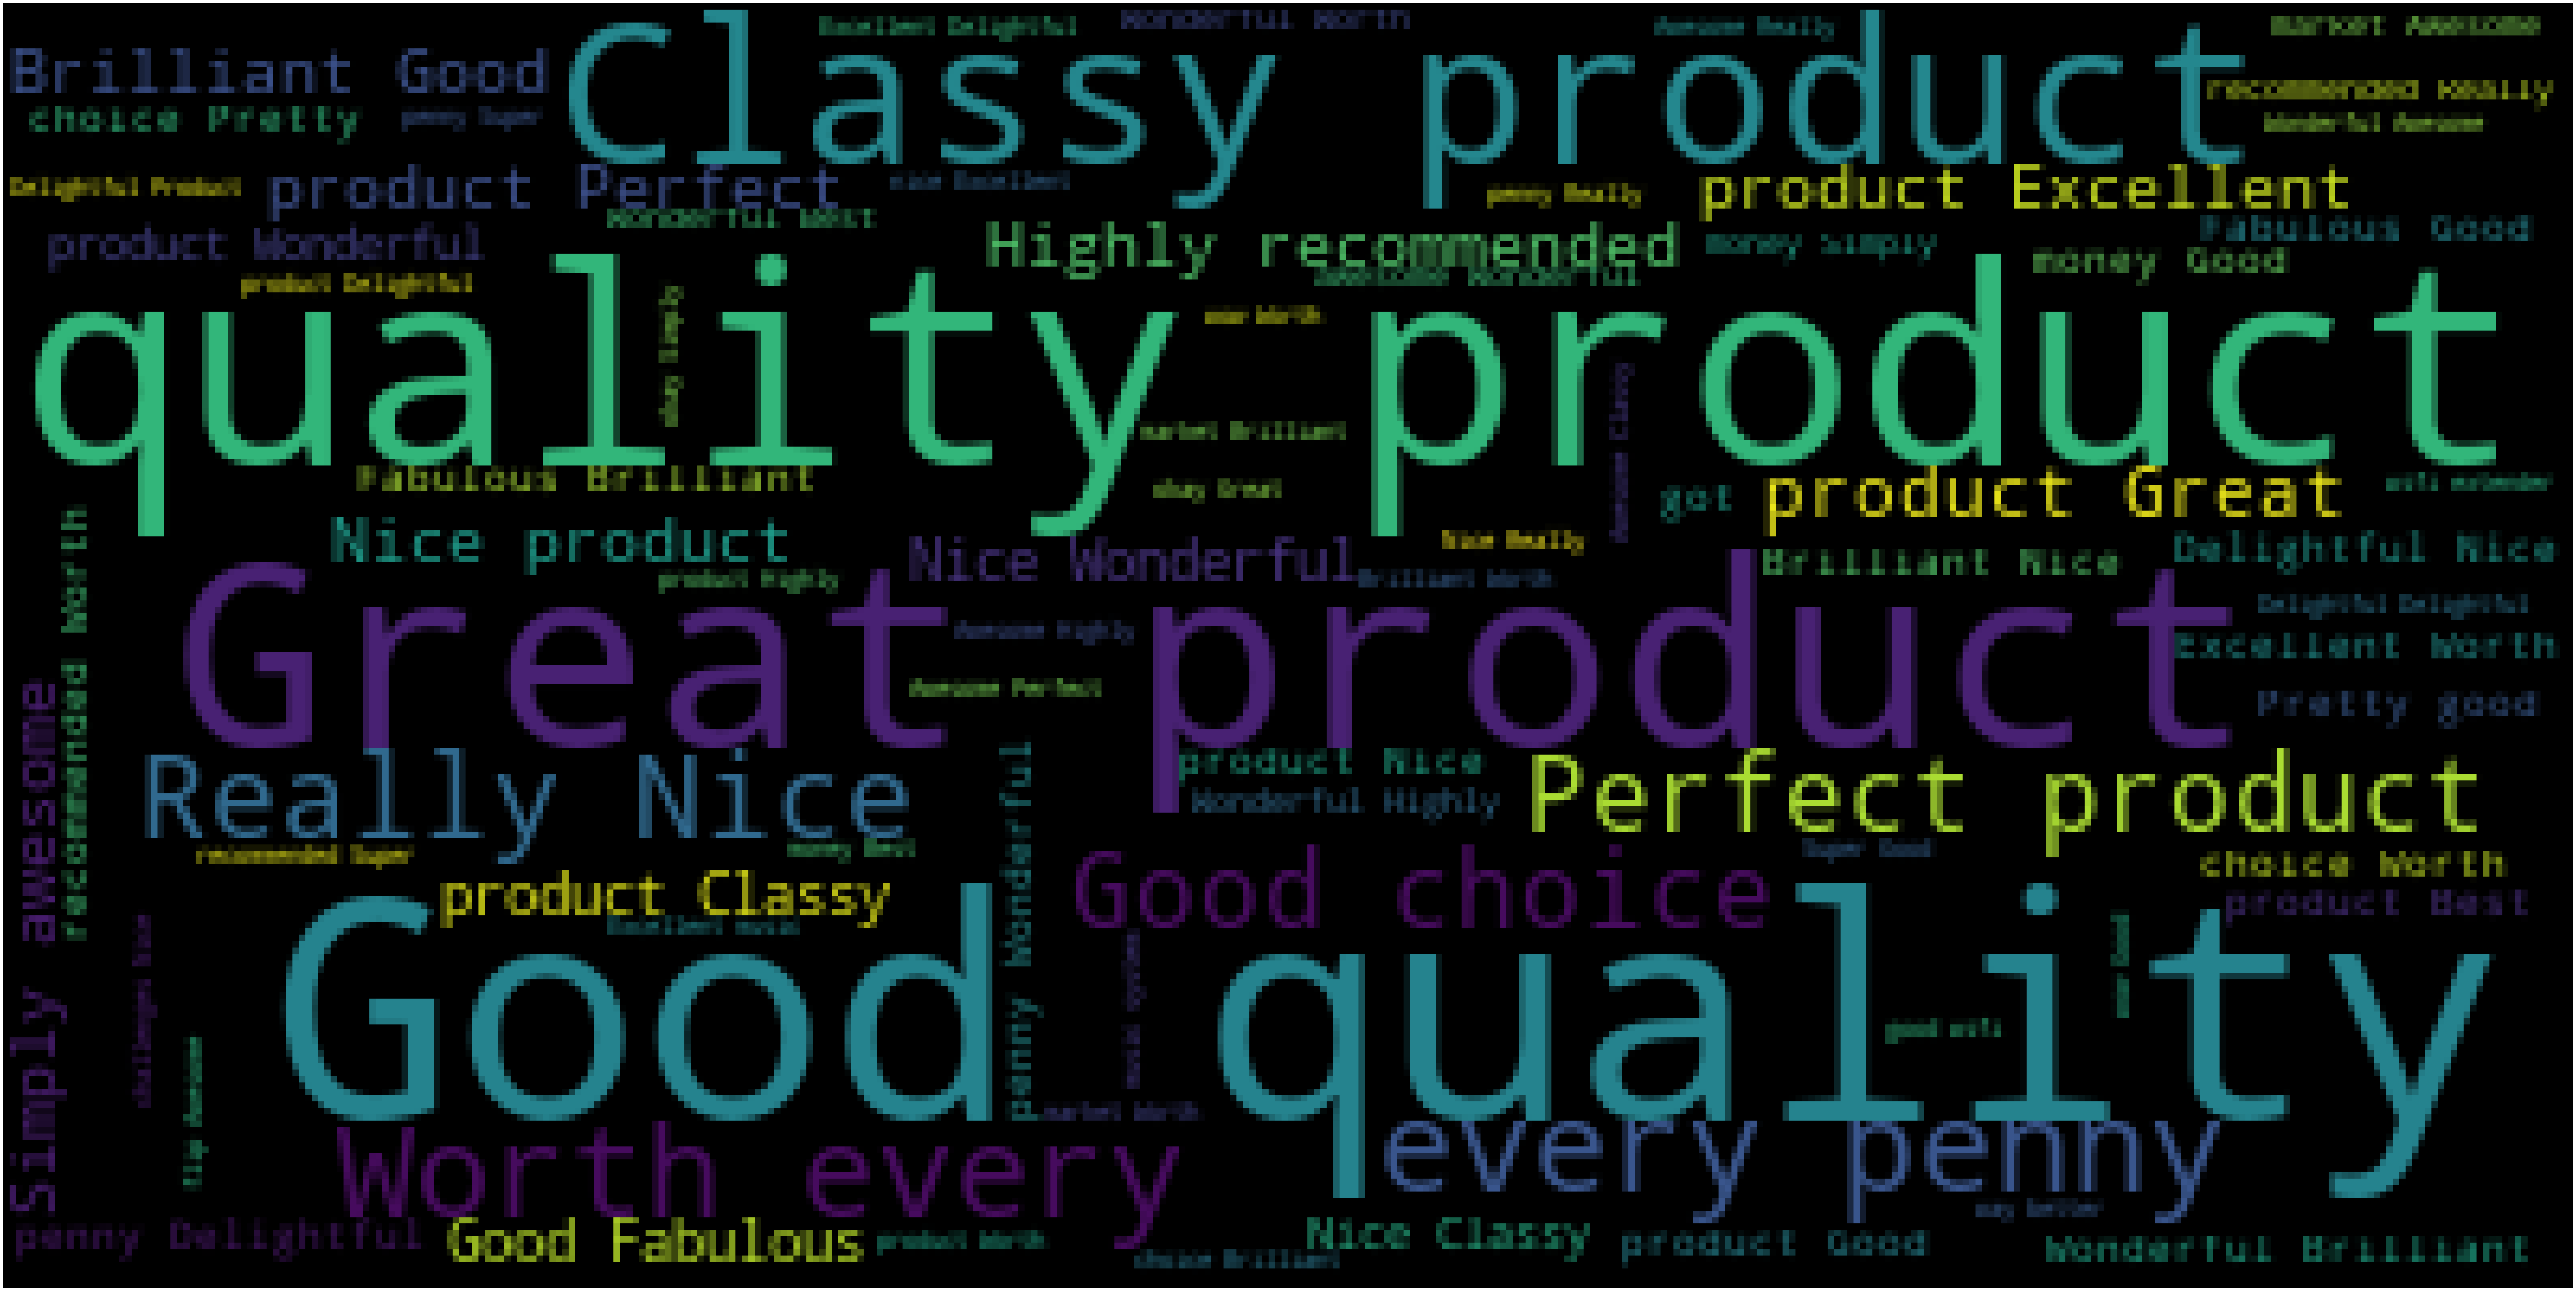

In [21]:
wc(positive_reviews['Reviews'],'black','Most Used Words')

The above wordcloud only for the Positive reviews.

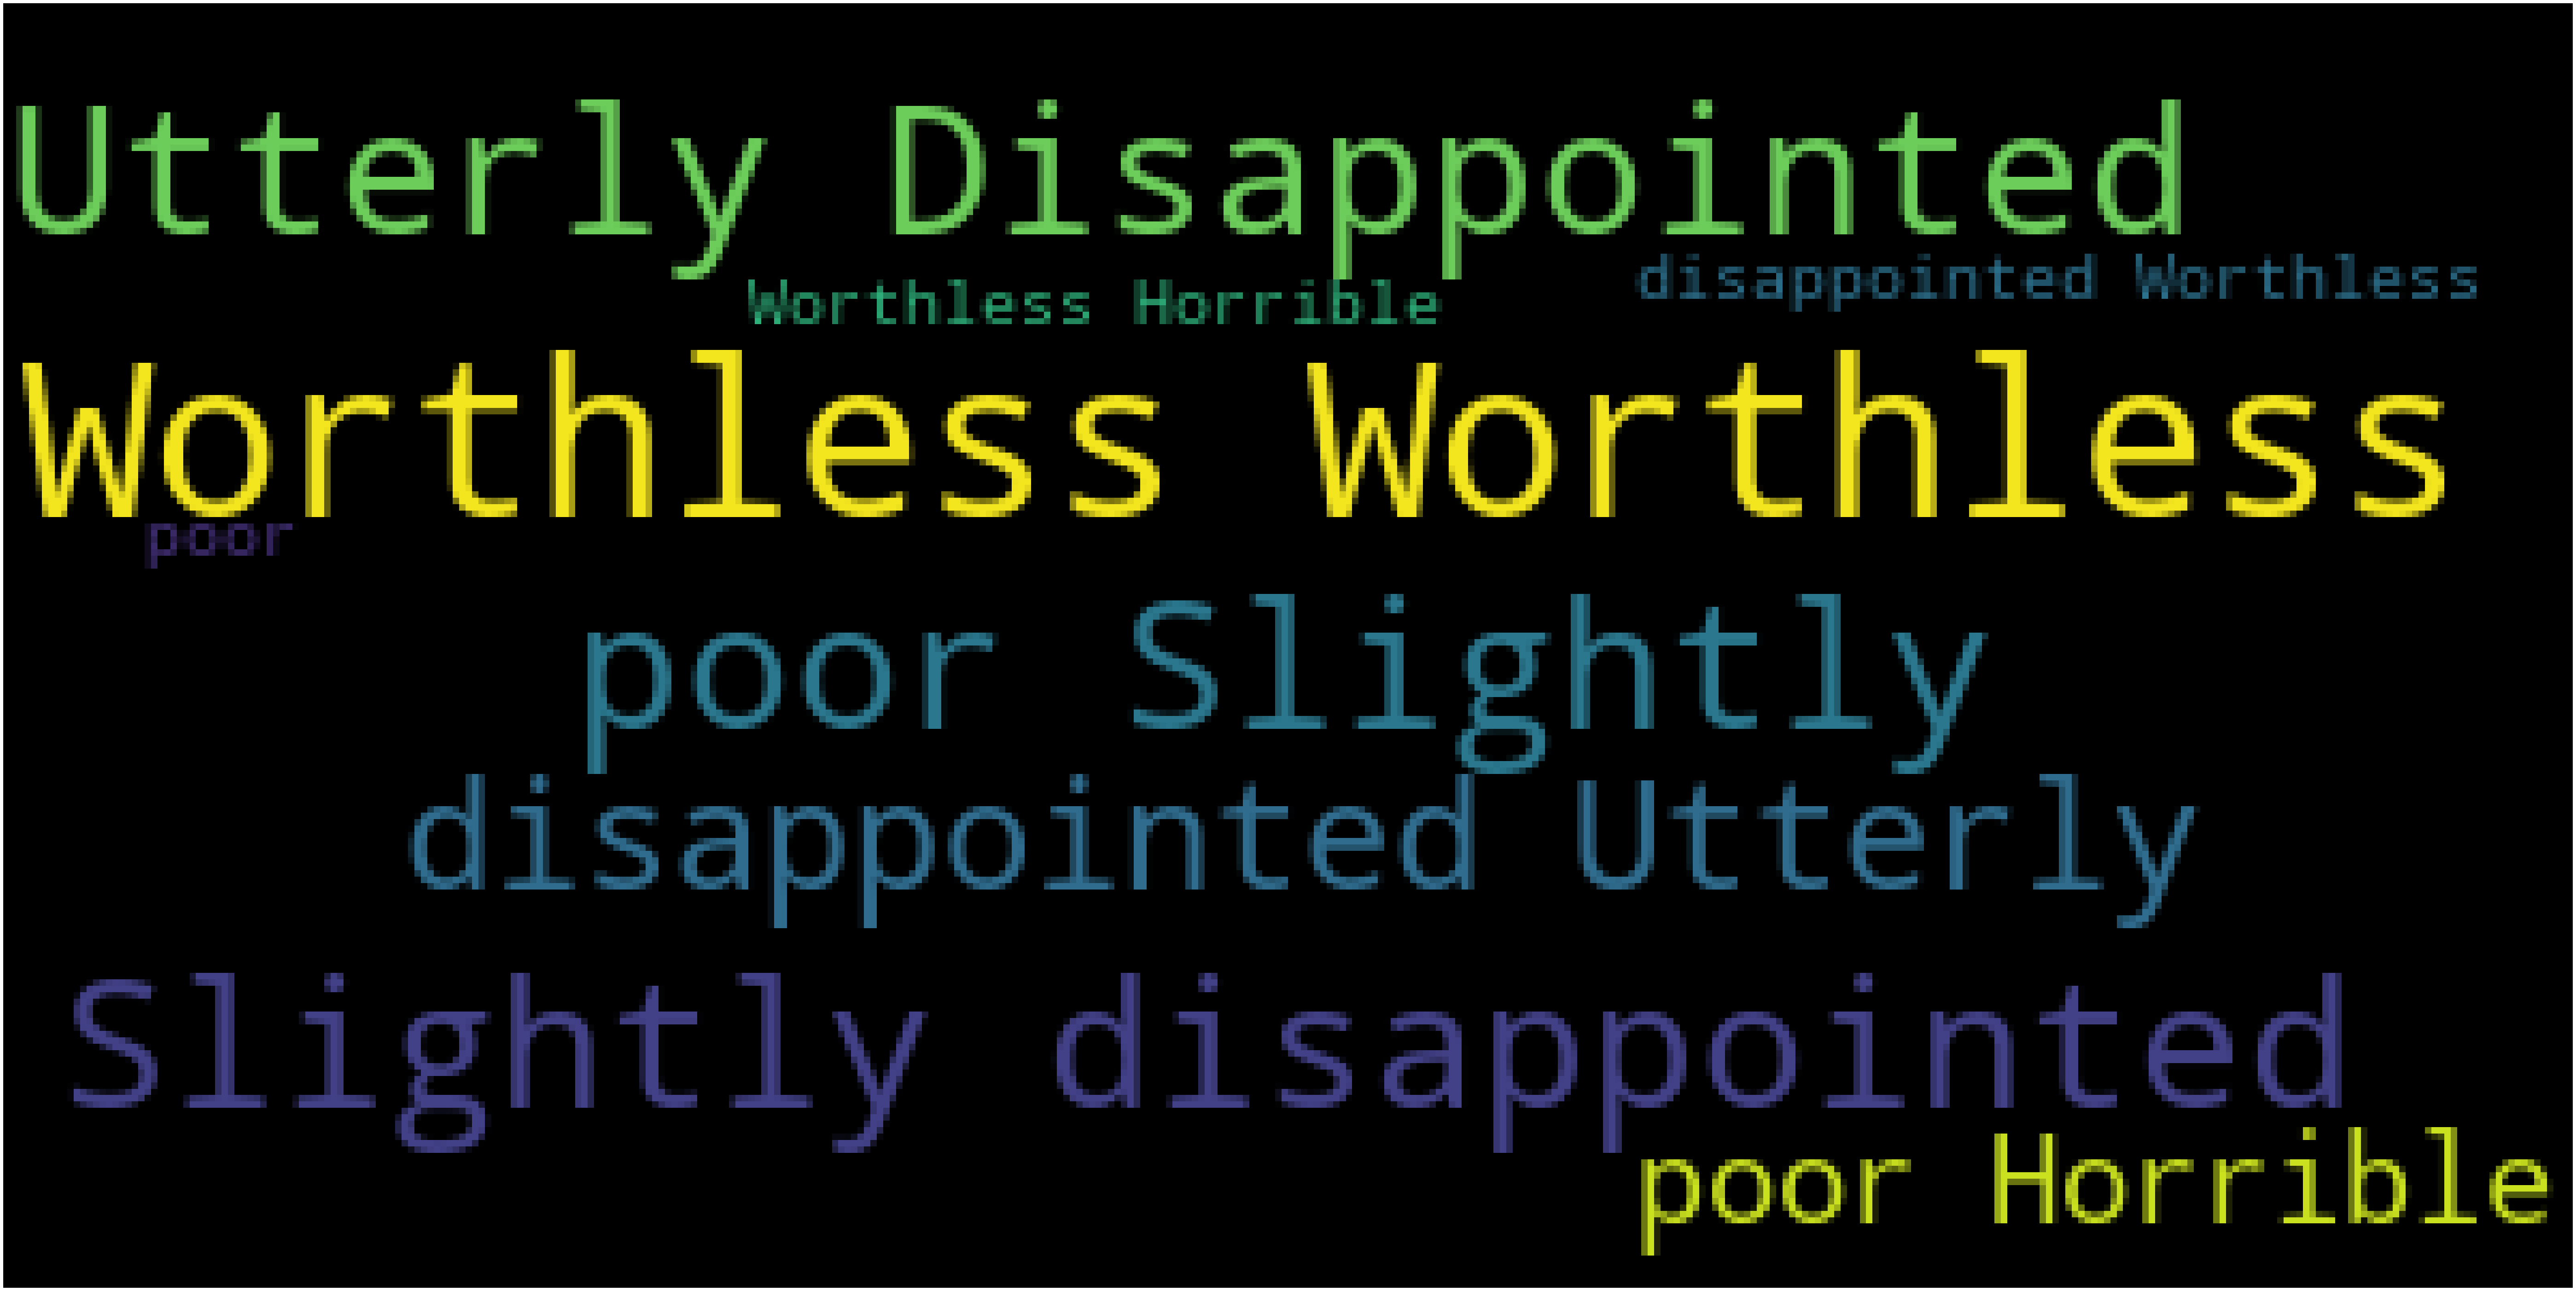

In [22]:
wc(negative_reviews['Reviews'],'black','Most Used Words')

The above wordcloud only for the Negative reviews.

In [23]:
import string
def text_process(Reviews):
    nopunc=[word for word in Reviews if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
df['Reviews'].head(5).apply(text_process)

0                      [okay]
1           [Simply, awesome]
2                       [wow]
3    [Good, quality, product]
4        [Terrific, purchase]
Name: Reviews, dtype: object

This is how the above function works. Basically, the above function removes the punctuations, converts word into lower case, and removes the stopwords from the sentence.

In [81]:
df=df.dropna(axis=0,how='any')
x=df['Reviews']
y=df['Rating']

At this moment, we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a reviews.

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()

x_reviews=vectorizer.fit_transform(x)

Training Data and Test Data

In [83]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_reviews, y, test_size=0.30, random_state=101)

In [84]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [85]:
predict=nb.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[ 120  156  176    0]
 [ 164 1502  725    0]
 [  93  551 4463    0]
 [   0    0    1    0]]


              precision    recall  f1-score   support

           3       0.32      0.27      0.29       452
           4       0.68      0.63      0.65      2391
           5       0.83      0.87      0.85      5107
      Rating       0.00      0.00      0.00         1

    accuracy                           0.77      7951
   macro avg       0.46      0.44      0.45      7951
weighted avg       0.76      0.77      0.76      7951



In [87]:
X_predict_recommend=df['Reviews']
y_recommend=df['Rating']

x_reviews=CountVectorizer().fit(X_predict_recommend)


X_predict_recommend = x_reviews.transform(X_predict_recommend)

X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict_recommendation=nb.predict(X_test)


print(confusion_matrix(y_test, predict_recommendation))
print('\n')
print(classification_report(y_test, predict_recommendation))

[[ 120  156  176    0]
 [ 164 1502  725    0]
 [  93  551 4463    0]
 [   0    0    1    0]]


              precision    recall  f1-score   support

           3       0.32      0.27      0.29       452
           4       0.68      0.63      0.65      2391
           5       0.83      0.87      0.85      5107
      Rating       0.00      0.00      0.00         1

    accuracy                           0.77      7951
   macro avg       0.46      0.44      0.45      7951
weighted avg       0.76      0.77      0.76      7951

